In [5]:
from OpInf import *
import numpy as np
import scipy
import umap

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.cm import ScalarMappable
from matplotlib.colors import LinearSegmentedColormap, ListedColormap
from matplotlib.colors import Normalize
from matplotlib.collections import LineCollection
from itertools import product, combinations

from sklearn.manifold import SpectralEmbedding

from pathlib import Path
import json
import stiefel

import importlib
importlib.reload(stiefel)

from scipy.io import loadmat
from operators import ckron, ckron_indices

import scienceplots
plt.style.use(["science", "no-latex", "grid"])

# set numpy random seed
np.random.seed(3)


In [9]:
# mus = [0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2]
mus = [1.2]
# Load data
T_end_train = 2 
dt= 1e-3
Train_T = int(T_end_train/dt)

# X_all_nominal = np.load("../examples/burgers/burgersFEniCSx_u_sol_all_RE1000.npy")[:, :Train_T+1, :]
# X_all_nominal = np.load("../examples/burgers/burgersFEniCSx_u_sol_all_RE1000_mu1.15_0.85.npy")[:, :Train_T+1, :]
# X_all_nominal = np.load("../examples/burgers/burgersFEniCSx_u_sol_all_RE1000_mu04_12.npy")[:, :Train_T+1, :]
# X_all_nominal = np.load("../examples/burgers/burgersFEniCSx_u_sol_all_RE1000_mu0.4_0.1_1.2_256.npy")[:, :Train_T+1, :]
# X_all_nominal = np.load("../examples/burgers/burgersFEniCSx_u_sol_all_RE10000_mu0.4_0.1_1.2_1024.npy")[:, :Train_T+1, :]
# X_all_test = np.load("../examples/burgers/burgersFEniCSx_u_sol_RE10000_mu0.98_512.npy")[0]

# X_all_nominal = np.load("../examples/burgers/burgersFEniCSx_u_sol_all_RE10000_mu0.4_0.1_1.2_1024_SUPG.npy")[:, :Train_T+1, :]
# X_all_nominal = np.load("../examples/burgers/burgersFEniCSx_u_sol_RE10000_mu1.2_1024_SUPG.npy")[:, :Train_T+1, :]
X_all_nominal = np.load("../examples/burgers/burgersFEniCSx_u_sol_RE10000_mu1.2_2048_SUPG.npy")[:, :Train_T+1, :]

In [10]:
X_all_nominal.shape

(1, 2001, 2049)

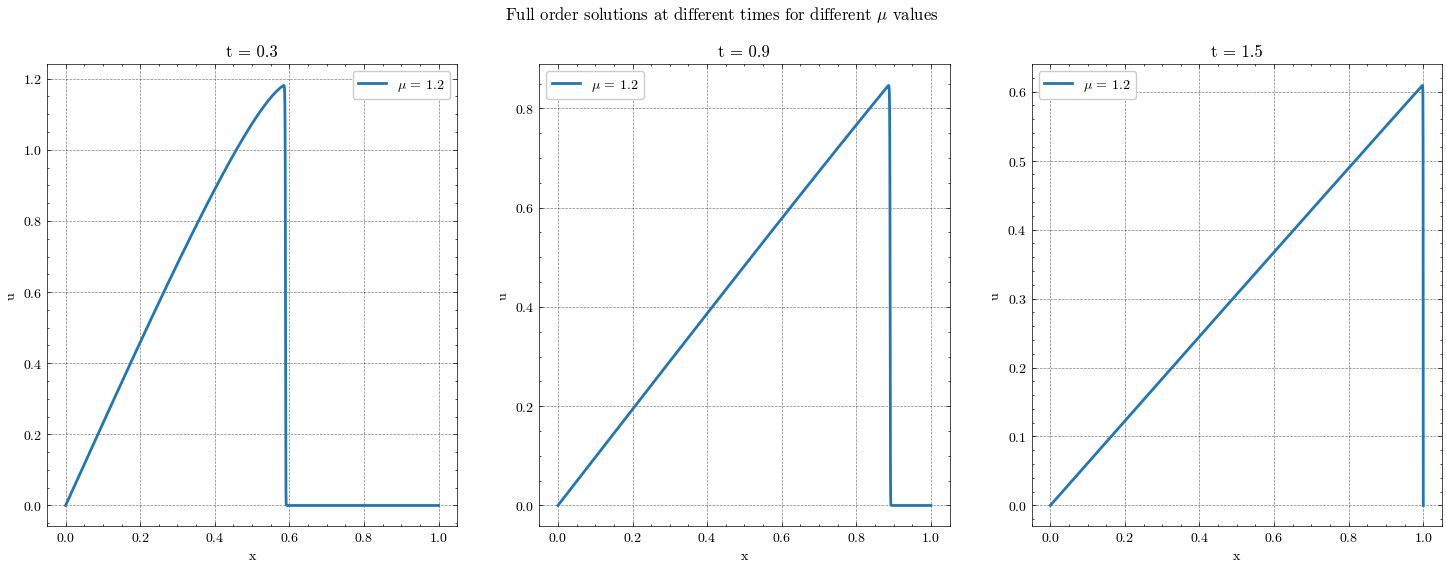

In [11]:
times = [0.3, 0.9, 1.5]

# Example setup (you'll need to define mean_s_rec_full, lower_bound, and upper_bound appropriately)
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

colors = plt.cm.tab20(np.linspace(0, 1, len(X_all_nominal)))

for i, t in enumerate(times):
    ax = axs[i]
    t_index = int(t / dt)  # Ensure dt is defined and properly calculated

    # Main plot
    x_values = np.linspace(0, 1, X_all_nominal[0].shape[1])
    
    for j in range(len(X_all_nominal)):
        ax.plot(x_values, X_all_nominal[j].T[:, t_index], label=f"$\mu$ = {mus[j]}", linestyle='-', alpha=1, color=colors[j], linewidth=2)
    
    ax.set_title(f"t = {t}")
    ax.set_xlabel('x')
    ax.set_ylabel('u')
    ax.legend(loc="best", fontsize='medium')
    
plt.suptitle(f"Full order solutions at different times for different $\mu$ values")
plt.show()
